In [2]:
import numpy as np
import sys
import matplotlib as mpl
# Choose plot backend.
# mpl.use('macosx')
# mpl.use('Qt5Agg')
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
from time import sleep
import pygsp as pg

sys.path.append('../dasf_toolbox/')
import tro_functions as tro
from dasf_toolbox import dasf
from dasf_toolbox import fdasf
from dasf_toolbox import dasf_block

In [3]:
norm_error = np.genfromtxt('dasf_error.csv', delimiter=",")
norm_error_fdasf=np.genfromtxt('fdasf_error.csv', delimiter=",")

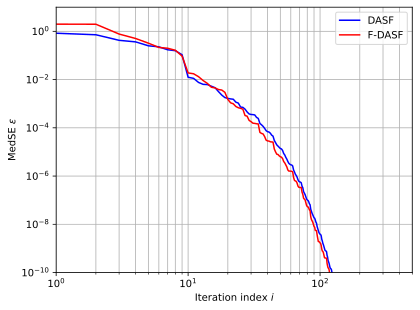

In [4]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

mc_runs = 3
nbnodes = 10
nbsensors_vec = 5 * np.ones(nbnodes)
nbsensors_vec = nbsensors_vec.astype(int)
nbsensors = np.sum(nbsensors_vec)
nbsamples = 10000
Q = 4
nbiter=500

# Plot the normalized error.
q5 = np.quantile(norm_error, 0.5, axis=0)
q5_fdasf = np.quantile(norm_error_fdasf, 0.5, axis=0)
iterations = np.arange(1, nbiter + 1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.loglog(iterations, q5, color='b', label='DASF')
ax.loglog(iterations, q5_fdasf, color='r', label='F-DASF')
ax.set_ylim([10e-11,10])
ax.set_xlim([1,nbiter])
ax.set_xlabel(r'Iteration index $i$')
ax.set_ylabel(r'MedSE $\epsilon$')
ax.grid(True, which='both')
ax.legend()
plt.show()

In [5]:
rng = np.random.default_rng()

noisepower = 0.1
signalvar = 0.5
nbsources = 2
latent_dim = 4
mixturevar = 0.1

s = rng.normal(loc=0, scale=np.sqrt(signalvar), size=(nbsources, nbsamples))

In [17]:
s_0 = s - s.mean(axis=1, keepdims=True)
s_0

array([[-0.79819514,  0.18269731,  0.00283477, ...,  1.29807777,
        -0.19195153, -1.01843245],
       [ 0.28826218,  1.49389194, -1.39297426, ...,  0.51748714,
        -0.83810991, -0.38690758]])

In [18]:
s_0.mean(axis=1), s_0.mean(axis=1).shape

(array([9.94759830e-18, 1.42108547e-18]), (2,))

In [25]:
s_norm = s_0 * np.sqrt(signalvar * np.ones((nbsources, 1)) / s_0.var(axis=1, keepdims=True))
s_norm

array([[-0.79899246,  0.18287981,  0.0028376 , ...,  1.29937442,
        -0.19214327, -1.01944976],
       [ 0.29133085,  1.50979506, -1.40780307, ...,  0.52299601,
        -0.84703196, -0.39102637]])

In [26]:
s_norm.var(axis=1, keepdims=True)

array([[0.5],
       [0.5]])

In [42]:
y = np.array(([1, 2, 3], [4, 5, 6]))
d = np.array(([1, 2, 3]))
np.sum(y * d, axis=1)

array([14, 32])

In [43]:
d * d

array([1, 4, 9])